## DEVELOP A MACHINE LEARNING MODEL TO PREDICT LIKELIHOOD OF A PERSON  HAVING AUTISM USING SURVEY AND DEMOGRAPHIC VARIABLES.



##### Autism, or autism spectrum disorder (ASD), refers to a broad range of conditions characterized by challenges with social skills, repetitive behaviors, speech and nonverbal communication.


######   <img src="autism.png" width="500" height="340">










## IMPORT LIBRARY

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

## IMPORT DATASET

In [2]:
df = pd.read_csv("autism_screening.csv")
pd.pandas.set_option("display.max_columns" , None)
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [4]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


### TO FIND UNIQUE VALUES IN EACH COLUMN

In [5]:
for i in df.columns:
    print("***********",i," *********")
    print()
    print(set(df[i].tolist()))
    print()

*********** A1_Score  *********

{0, 1}

*********** A2_Score  *********

{0, 1}

*********** A3_Score  *********

{0, 1}

*********** A4_Score  *********

{0, 1}

*********** A5_Score  *********

{0, 1}

*********** A6_Score  *********

{0, 1}

*********** A7_Score  *********

{0, 1}

*********** A8_Score  *********

{0, 1}

*********** A9_Score  *********

{0, 1}

*********** A10_Score  *********

{0, 1}

*********** age  *********

{nan, nan, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 58.0, 59.0, 60.0, 61.0, 64.0, 383.0}

*********** gender  *********

{'f', 'm'}

*********** ethnicity  *********

{'White-European', 'Pasifika', '?', 'Latino', 'Black', 'others', 'Others', 'Turkish', 'South Asian', 'Middle Eastern ', 'Asian', 'Hispanic'}

*********** jundice  *********

{'no', 'yes'}

******

##### REPLACE UNNECESSARY VALUES IN EACH COLUMN

In [6]:
df["ethnicity"] = df["ethnicity"].replace("?",np.nan)
df["ethnicity"] = df["ethnicity"].replace("others","Others")

In [7]:
df["relation"] = df["relation"].replace("?",np.nan)

In [8]:
df["age"] =df["age"].replace(383.0, df["age"].median())

## DATA PREPROCESSING

### 1. MISSING VALUE TREATMENT

In [9]:
df.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

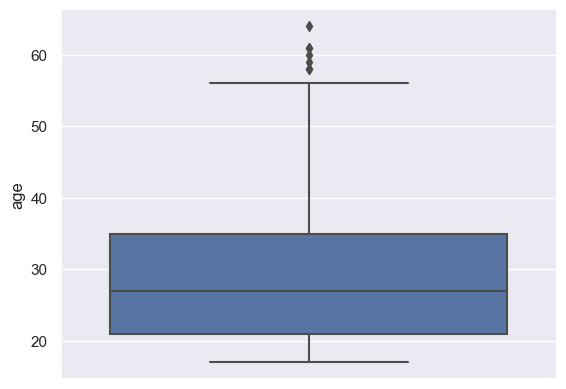

In [10]:
sns.boxplot(y="age", data = df)     
plt.show()

In [11]:
df["age"] = df["age"].fillna(df["age"].median())  #OUTLIER FOUND IMPUTE MEDIAN

In [12]:
df["ethnicity"].value_counts()

White-European     233
Asian              123
Middle Eastern      92
Black               43
South Asian         36
Others              31
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
Name: ethnicity, dtype: int64

In [13]:
df["ethnicity"] = df["ethnicity"].fillna("White-European")

In [14]:
df["relation"].value_counts()

Self                        522
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: relation, dtype: int64

In [15]:
df["relation"] = df["relation"].fillna("Self")

### 2. ENCODING PART  - LABEL ENCODER

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              704 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [18]:
df1 = df.select_dtypes(exclude=['float64']).apply(preprocessing.LabelEncoder().fit_transform)
df1

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,0,9,0,0,64,0,0,4,0
1,1,1,0,1,0,0,0,1,0,1,1,3,0,1,13,0,0,4,0
2,1,1,0,1,1,0,1,1,1,1,1,3,1,1,56,0,0,2,1
3,1,1,0,1,0,0,1,1,0,1,0,9,0,1,64,0,0,4,0
4,1,0,0,0,0,0,0,1,0,0,0,9,0,0,22,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,0,9,0,0,51,0,0,4,1
700,1,0,0,0,0,0,0,1,0,1,1,2,0,0,40,0,0,2,0
701,1,0,1,1,1,0,1,1,0,1,0,9,0,0,51,0,0,4,1
702,1,0,0,1,1,0,1,0,1,1,1,7,0,0,47,0,0,4,0


In [19]:
df2 = df[["age" , "result"]]
df2

,age,result
0,26.0,6.0
1,24.0,5.0
2,27.0,8.0
3,35.0,6.0
4,40.0,2.0
...,...,...
699,25.0,7.0
700,34.0,3.0
701,24.0,7.0
702,35.0,6.0


In [20]:
df_new = pd.concat([df1 , df2] , axis=1)
df_new

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD,age,result
0,1,1,1,1,0,0,1,1,0,0,0,9,0,0,64,0,0,4,0,26.0,6.0
1,1,1,0,1,0,0,0,1,0,1,1,3,0,1,13,0,0,4,0,24.0,5.0
2,1,1,0,1,1,0,1,1,1,1,1,3,1,1,56,0,0,2,1,27.0,8.0
3,1,1,0,1,0,0,1,1,0,1,0,9,0,1,64,0,0,4,0,35.0,6.0
4,1,0,0,0,0,0,0,1,0,0,0,9,0,0,22,0,0,4,0,40.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,0,9,0,0,51,0,0,4,1,25.0,7.0
700,1,0,0,0,0,0,0,1,0,1,1,2,0,0,40,0,0,2,0,34.0,3.0
701,1,0,1,1,1,0,1,1,0,1,0,9,0,0,51,0,0,4,1,24.0,7.0
702,1,0,0,1,1,0,1,0,1,1,1,7,0,0,47,0,0,4,0,35.0,6.0


In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  gender           704 non-null    int32  
 11  ethnicity        704 non-null    int32  
 12  jundice          704 non-null    int32  
 13  austim           704 non-null    int32  
 14  contry_of_res    704 non-null    int32  
 15  used_app_before  704 non-null    int32  
 16  age_desc         704 non-null    int32  
 17  relation        

### 3. HANDLING OUTLIER

###### (Outlier treatment not required in this case)

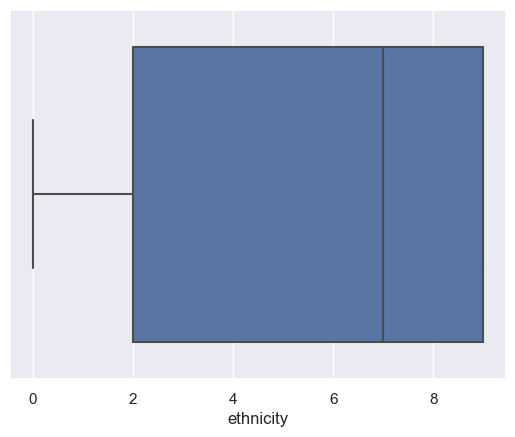

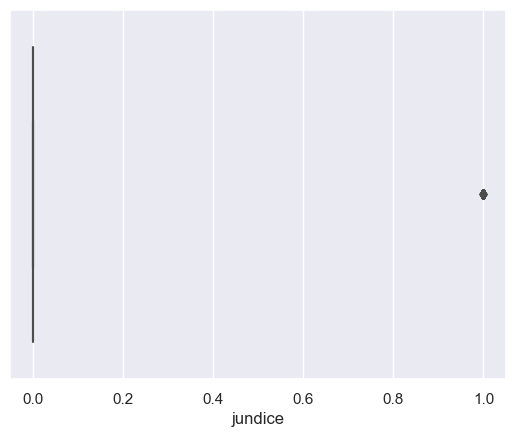

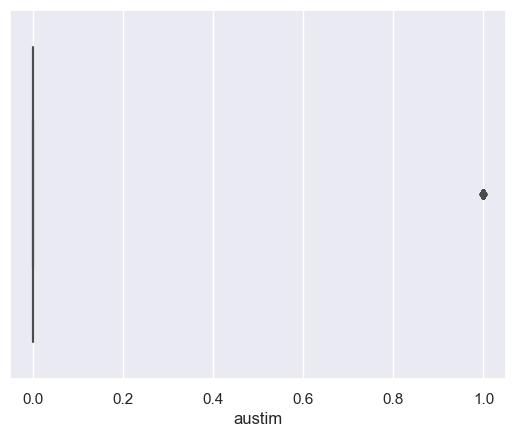

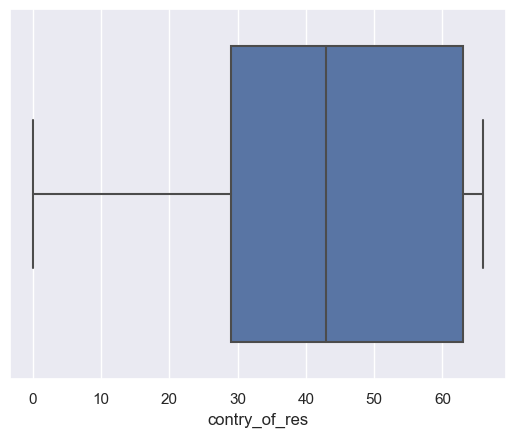

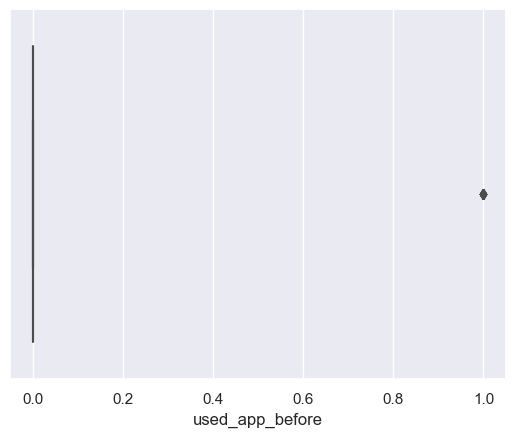

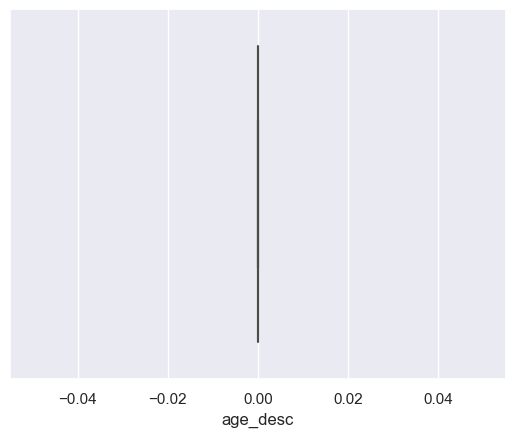

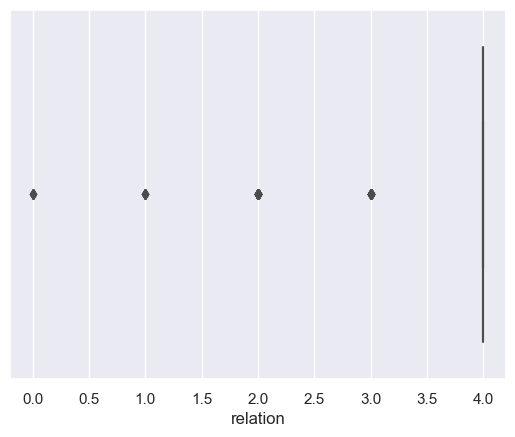

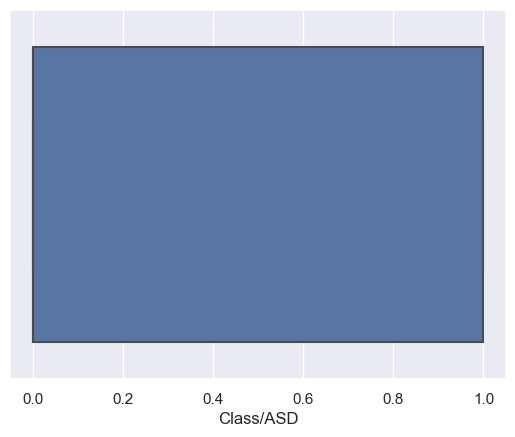

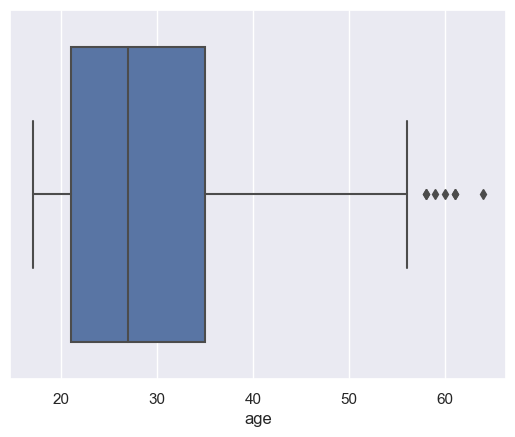

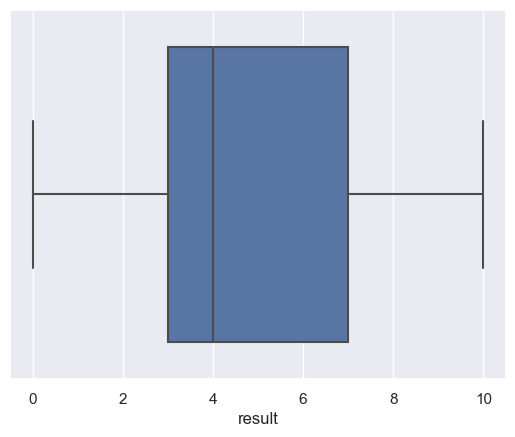

In [77]:
def boxplots(col):
    sns.boxplot(df_new[col])
    plt.show()
for i in list(df_new.columns)[11:]:
    boxplots(i)

### 4. FEATURE SCALING  - STANDARD SCALER

In [76]:
# SPLIT VARIABLE X AND Y - FEATURE SCALING ONLY FOR INDEPENDENT VARIABLES

x = df_new.drop(["austim"], axis=1)
y = df_new[["austim"]]

In [24]:
x.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,contry_of_res,used_app_before,age_desc,relation,Class/ASD,age,result
0,1,1,1,1,0,0,1,1,0,0,0,9,0,64,0,0,4,0,26.0,6.0
1,1,1,0,1,0,0,0,1,0,1,1,3,0,13,0,0,4,0,24.0,5.0
2,1,1,0,1,1,0,1,1,1,1,1,3,1,56,0,0,2,1,27.0,8.0
3,1,1,0,1,0,0,1,1,0,1,0,9,0,64,0,0,4,0,35.0,6.0
4,1,0,0,0,0,0,0,1,0,0,0,9,0,22,0,0,4,0,40.0,2.0


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x = pd.DataFrame(sc_x)
sc_x.columns = x.columns
sc_x

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,contry_of_res,used_app_before,age_desc,relation,Class/ASD,age,result
0,0.621150,1.098588,1.089190,1.008559,-0.997163,-0.629941,1.180914,0.735174,-0.692092,-1.160460,-1.043562,0.926588,-0.329638,1.034154,-0.131685,0.0,0.345353,-0.605797,-0.328826,0.450051
1,0.621150,1.098588,-0.918113,1.008559,-0.997163,-0.629941,-0.846802,0.735174,-0.692092,0.861727,0.958257,-0.731847,-0.329638,-1.609511,-0.131685,0.0,0.345353,-0.605797,-0.535331,0.050006
2,0.621150,1.098588,-0.918113,1.008559,1.002845,-0.629941,1.180914,0.735174,1.444894,0.861727,0.958257,-0.731847,3.033628,0.619462,-0.131685,0.0,-2.712866,1.650717,-0.225573,1.250142
3,0.621150,1.098588,-0.918113,1.008559,-0.997163,-0.629941,1.180914,0.735174,-0.692092,0.861727,-1.043562,0.926588,-0.329638,1.034154,-0.131685,0.0,0.345353,-0.605797,0.600451,0.450051
4,0.621150,-0.910259,-0.918113,-0.991513,-0.997163,-0.629941,-0.846802,0.735174,-0.692092,-1.160460,-1.043562,0.926588,-0.329638,-1.142982,-0.131685,0.0,0.345353,-0.605797,1.116716,-1.150131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,-1.609918,1.098588,-0.918113,1.008559,1.002845,-0.629941,1.180914,0.735174,1.444894,0.861727,-1.043562,0.926588,-0.329638,0.360279,-0.131685,0.0,0.345353,1.650717,-0.432078,0.850097
700,0.621150,-0.910259,-0.918113,-0.991513,-0.997163,-0.629941,-0.846802,0.735174,-0.692092,0.861727,0.958257,-1.008253,-0.329638,-0.209923,-0.131685,0.0,-2.712866,-0.605797,0.497198,-0.750085
701,0.621150,-0.910259,1.089190,1.008559,1.002845,-0.629941,1.180914,0.735174,-0.692092,0.861727,-1.043562,0.926588,-0.329638,0.360279,-0.131685,0.0,0.345353,1.650717,-0.535331,0.850097
702,0.621150,-0.910259,-0.918113,1.008559,1.002845,-0.629941,1.180914,-1.360221,1.444894,0.861727,0.958257,0.373776,-0.329638,0.152933,-0.131685,0.0,0.345353,-0.605797,0.600451,0.450051


### 5. IMBALANCE CHECK

In [26]:
y.value_counts()

austim
0         613
1          91
dtype: int64

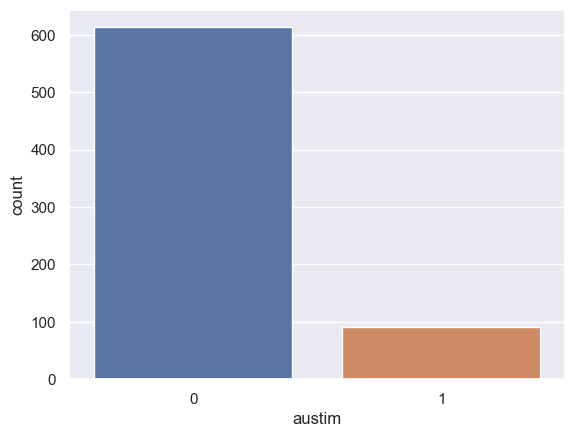

In [27]:
sns.countplot(data = df_new , x="austim" )
plt.show()

##### USING OVERSAMPLING METHOD - BALANCING THE DATASET

In [28]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

In [29]:
x_ros , y_ros = ros.fit_resample(sc_x , y)
print(y_ros.value_counts())

austim
0         613
1         613
dtype: int64


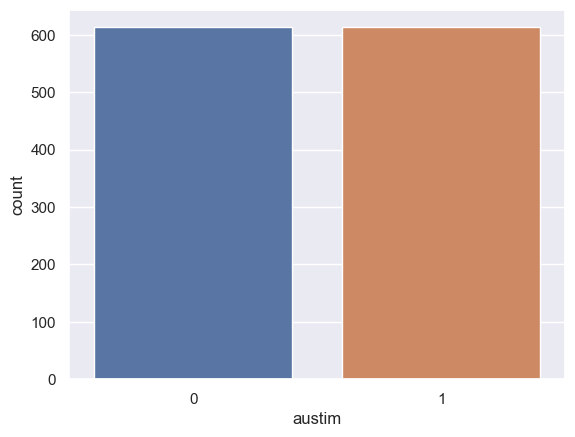

In [30]:
sns.countplot(data = y_ros , x="austim" )
plt.show()

## EXPLORATORY DATA ANALYSIS (EDA)

### 1. DISTRIBUTION PLOT

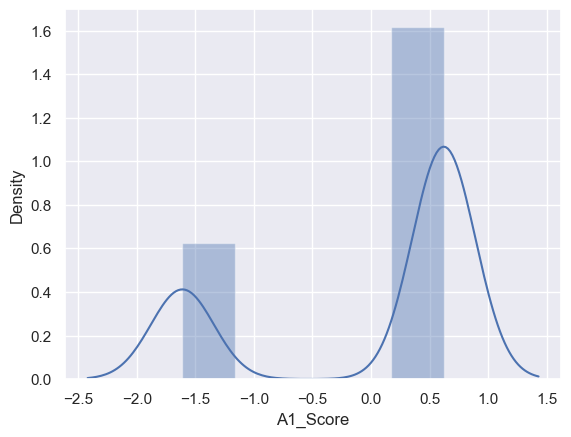

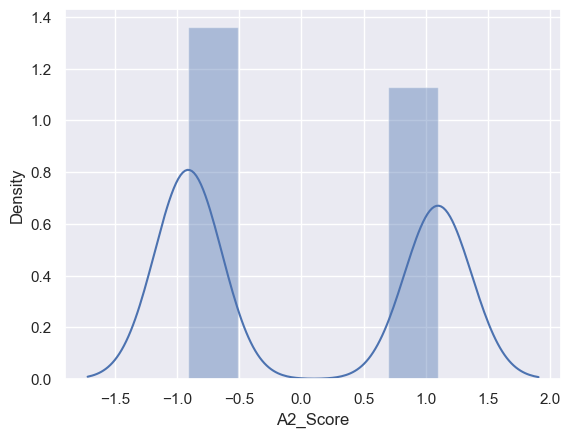

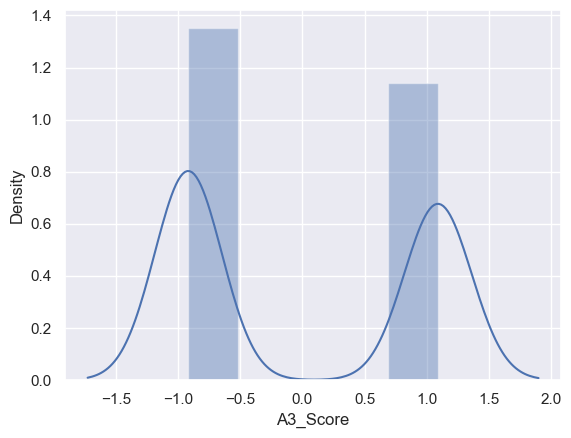

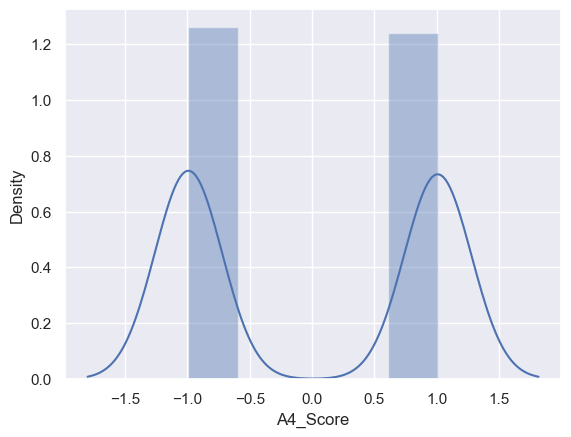

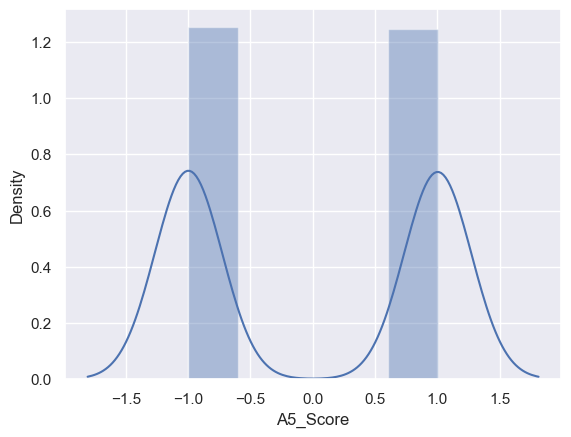

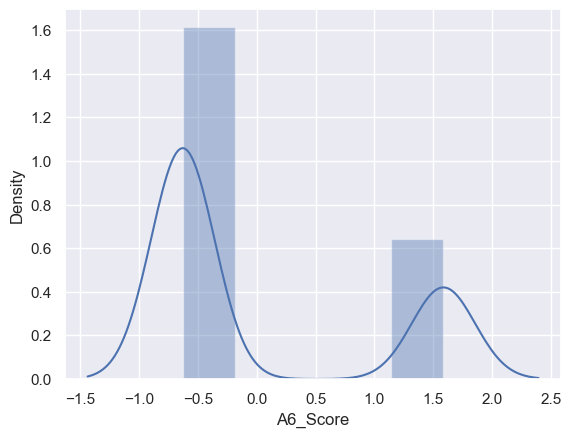

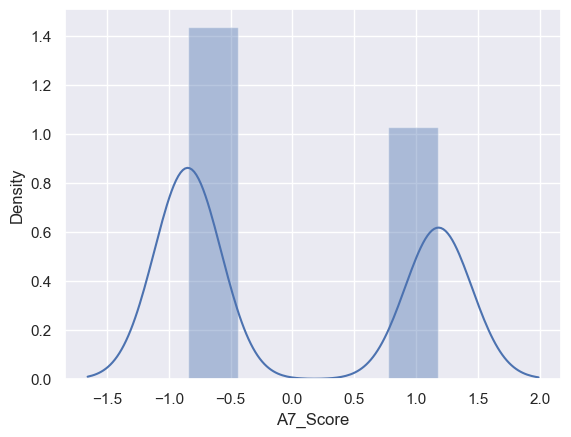

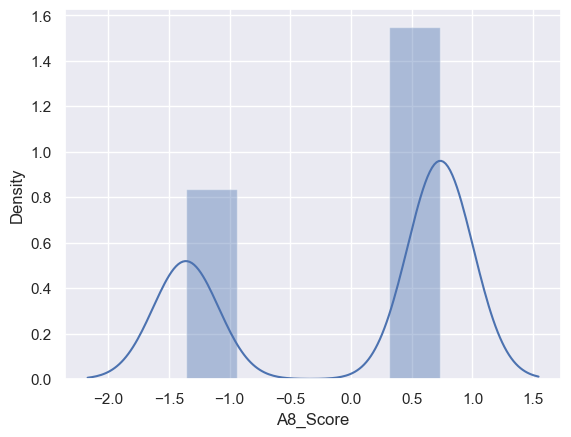

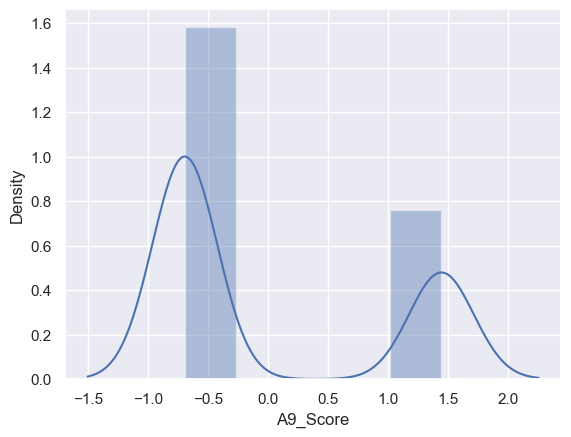

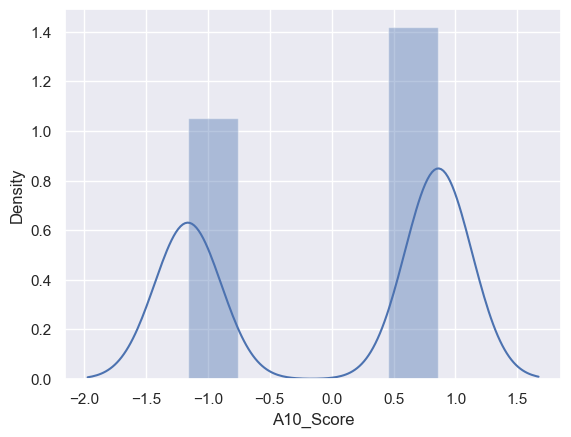

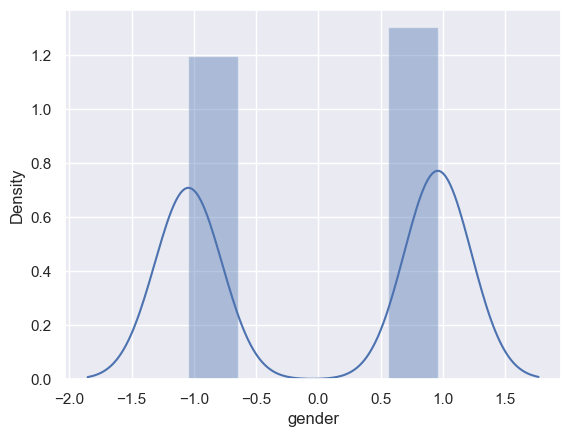

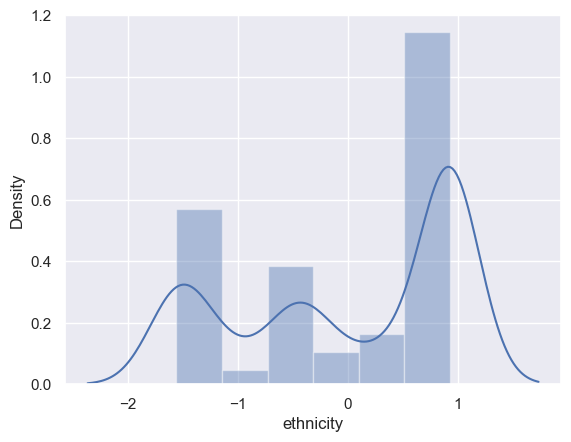

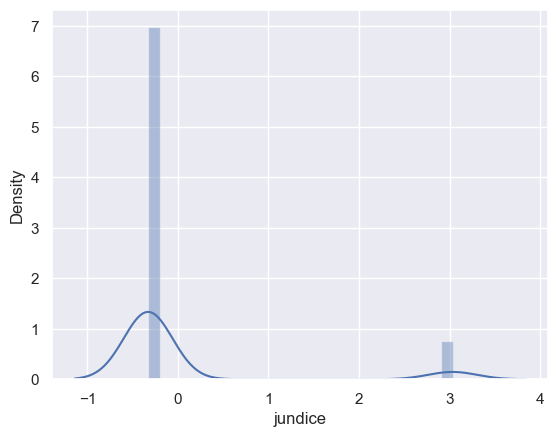

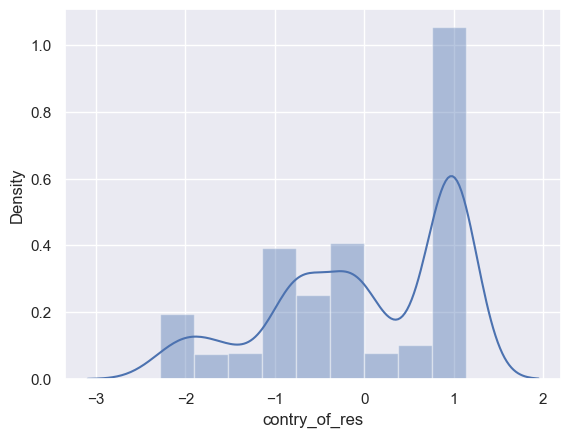

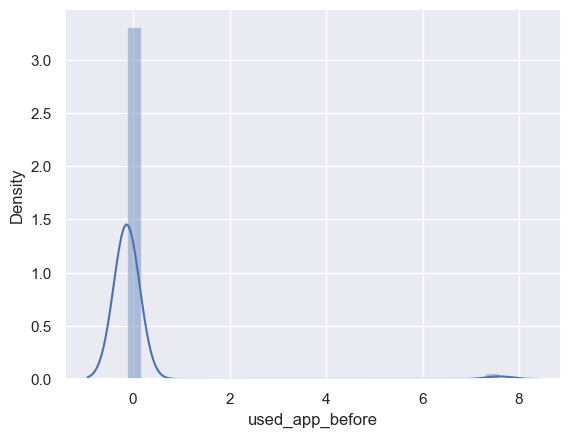

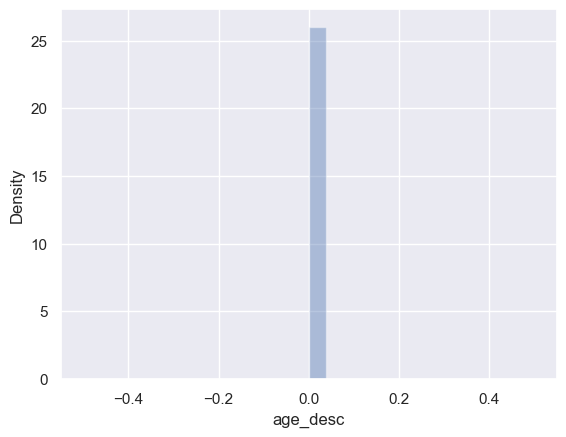

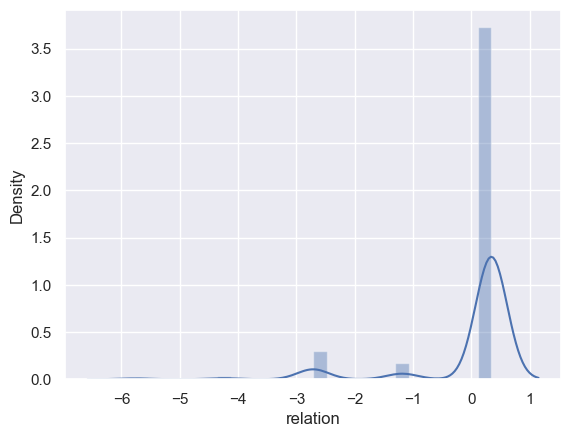

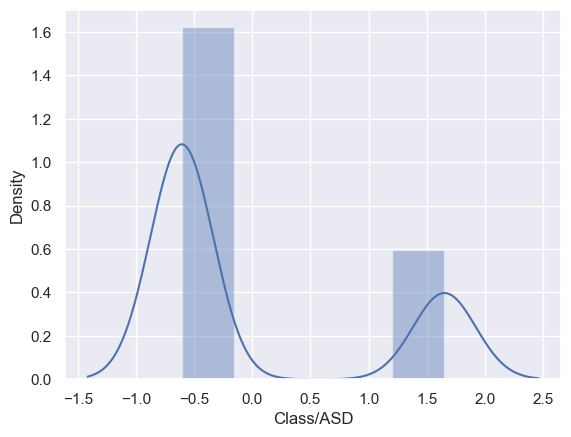

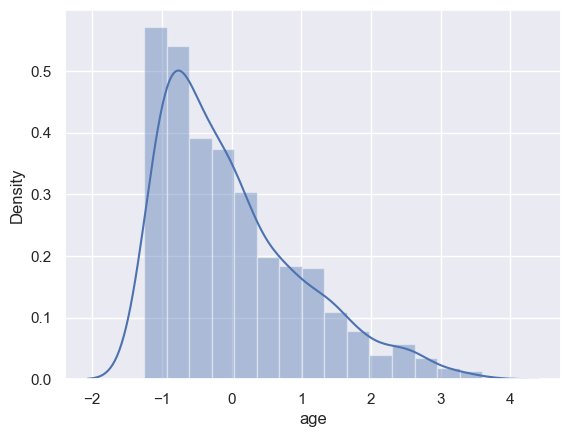

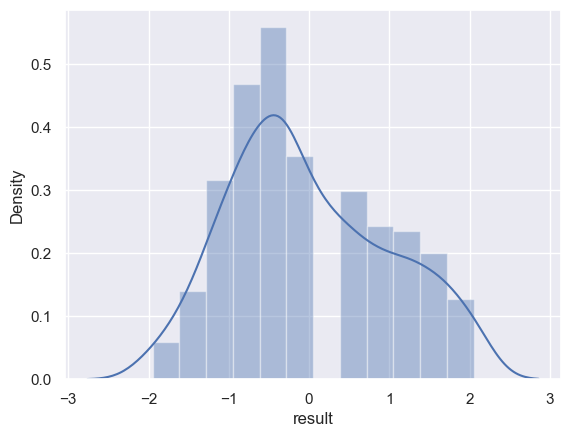

In [32]:
def distplots(col):
    sns.distplot(sc_x[col])
    plt.show()
for i in list(sc_x.columns)[0:]:
    distplots(i)

### 2. HEAT MAP - FOR FINDING CORRELATION

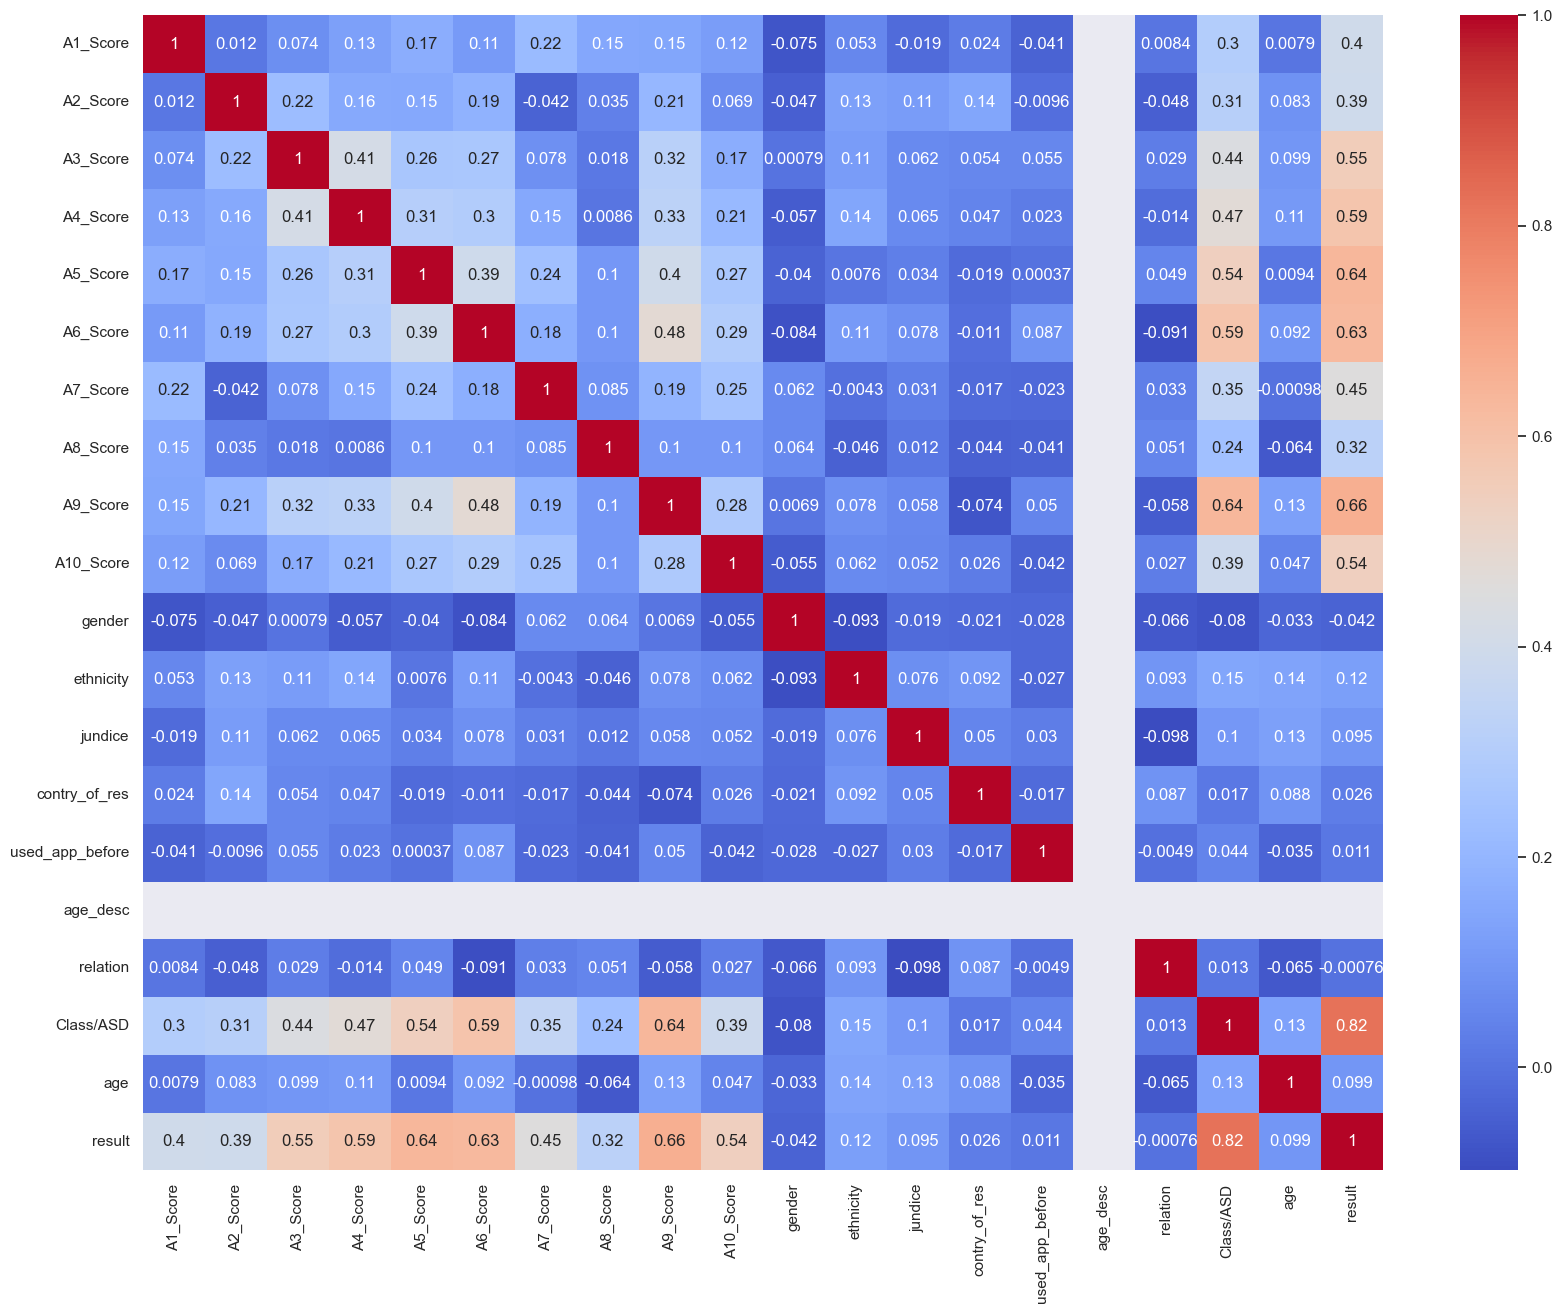

In [34]:
plt.figure(figsize=(20,15))
corr1 = sc_x.corr()
sns.heatmap(corr1 , annot=True , cmap= "coolwarm")
plt.show()

####   ---------THERE IS NO CORRELATION IN THE DATSET ----------

### 3. HISTOGRAM

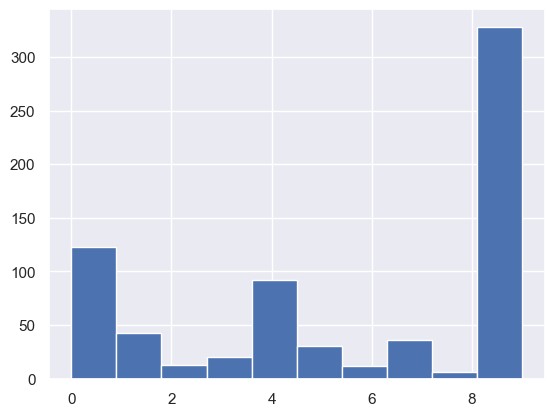

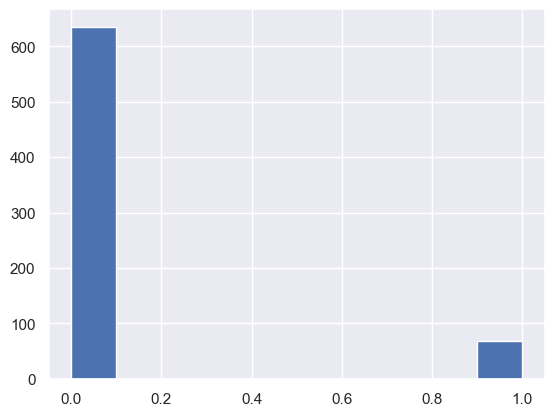

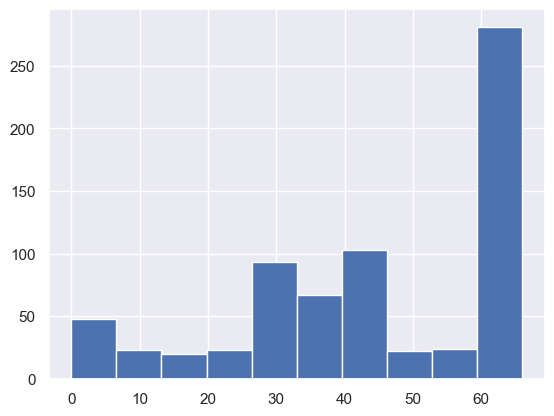

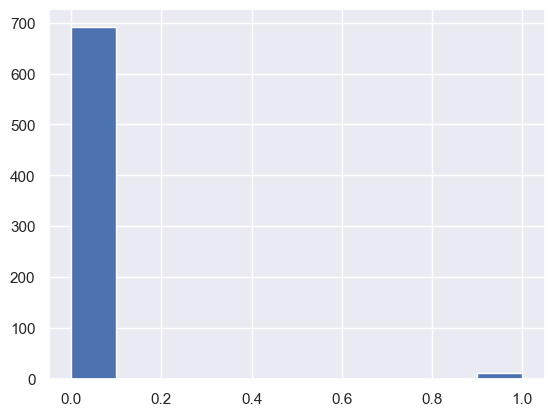

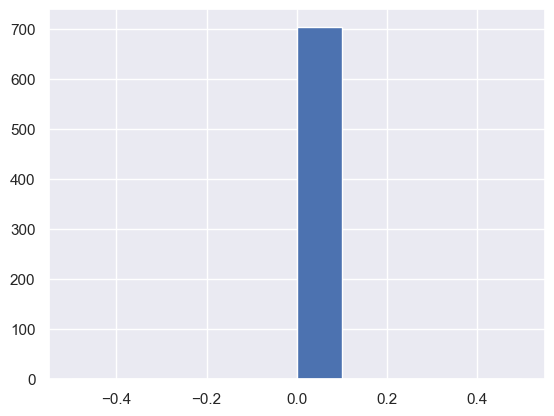

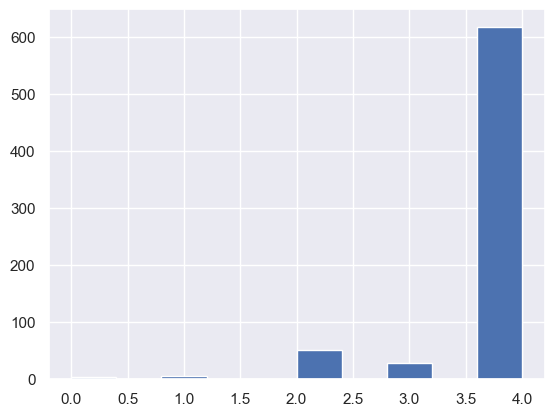

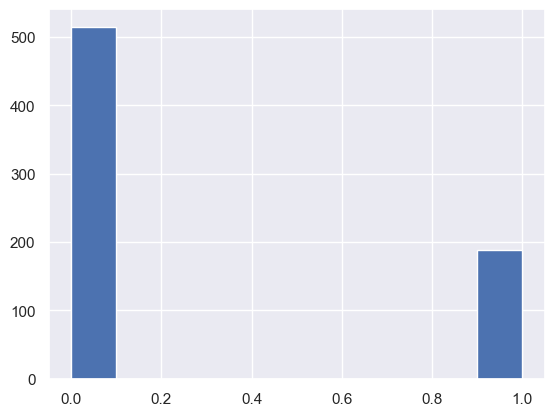

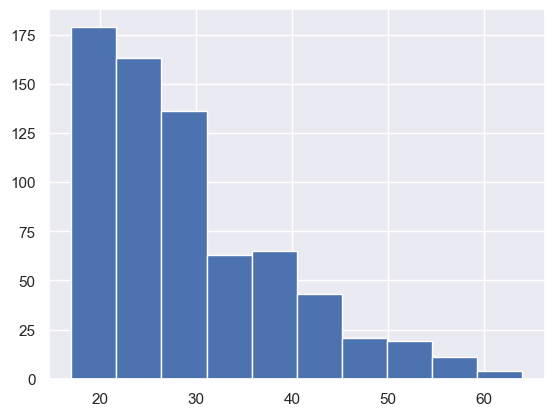

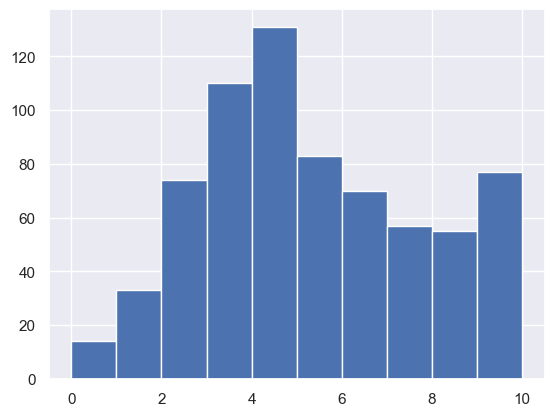

In [36]:
def histograms(col):
    plt.hist(df_new[col])
    plt.show()
for i in list(sc_x.columns)[11:]:
    histograms(i)

### 4. PAIR PLOT

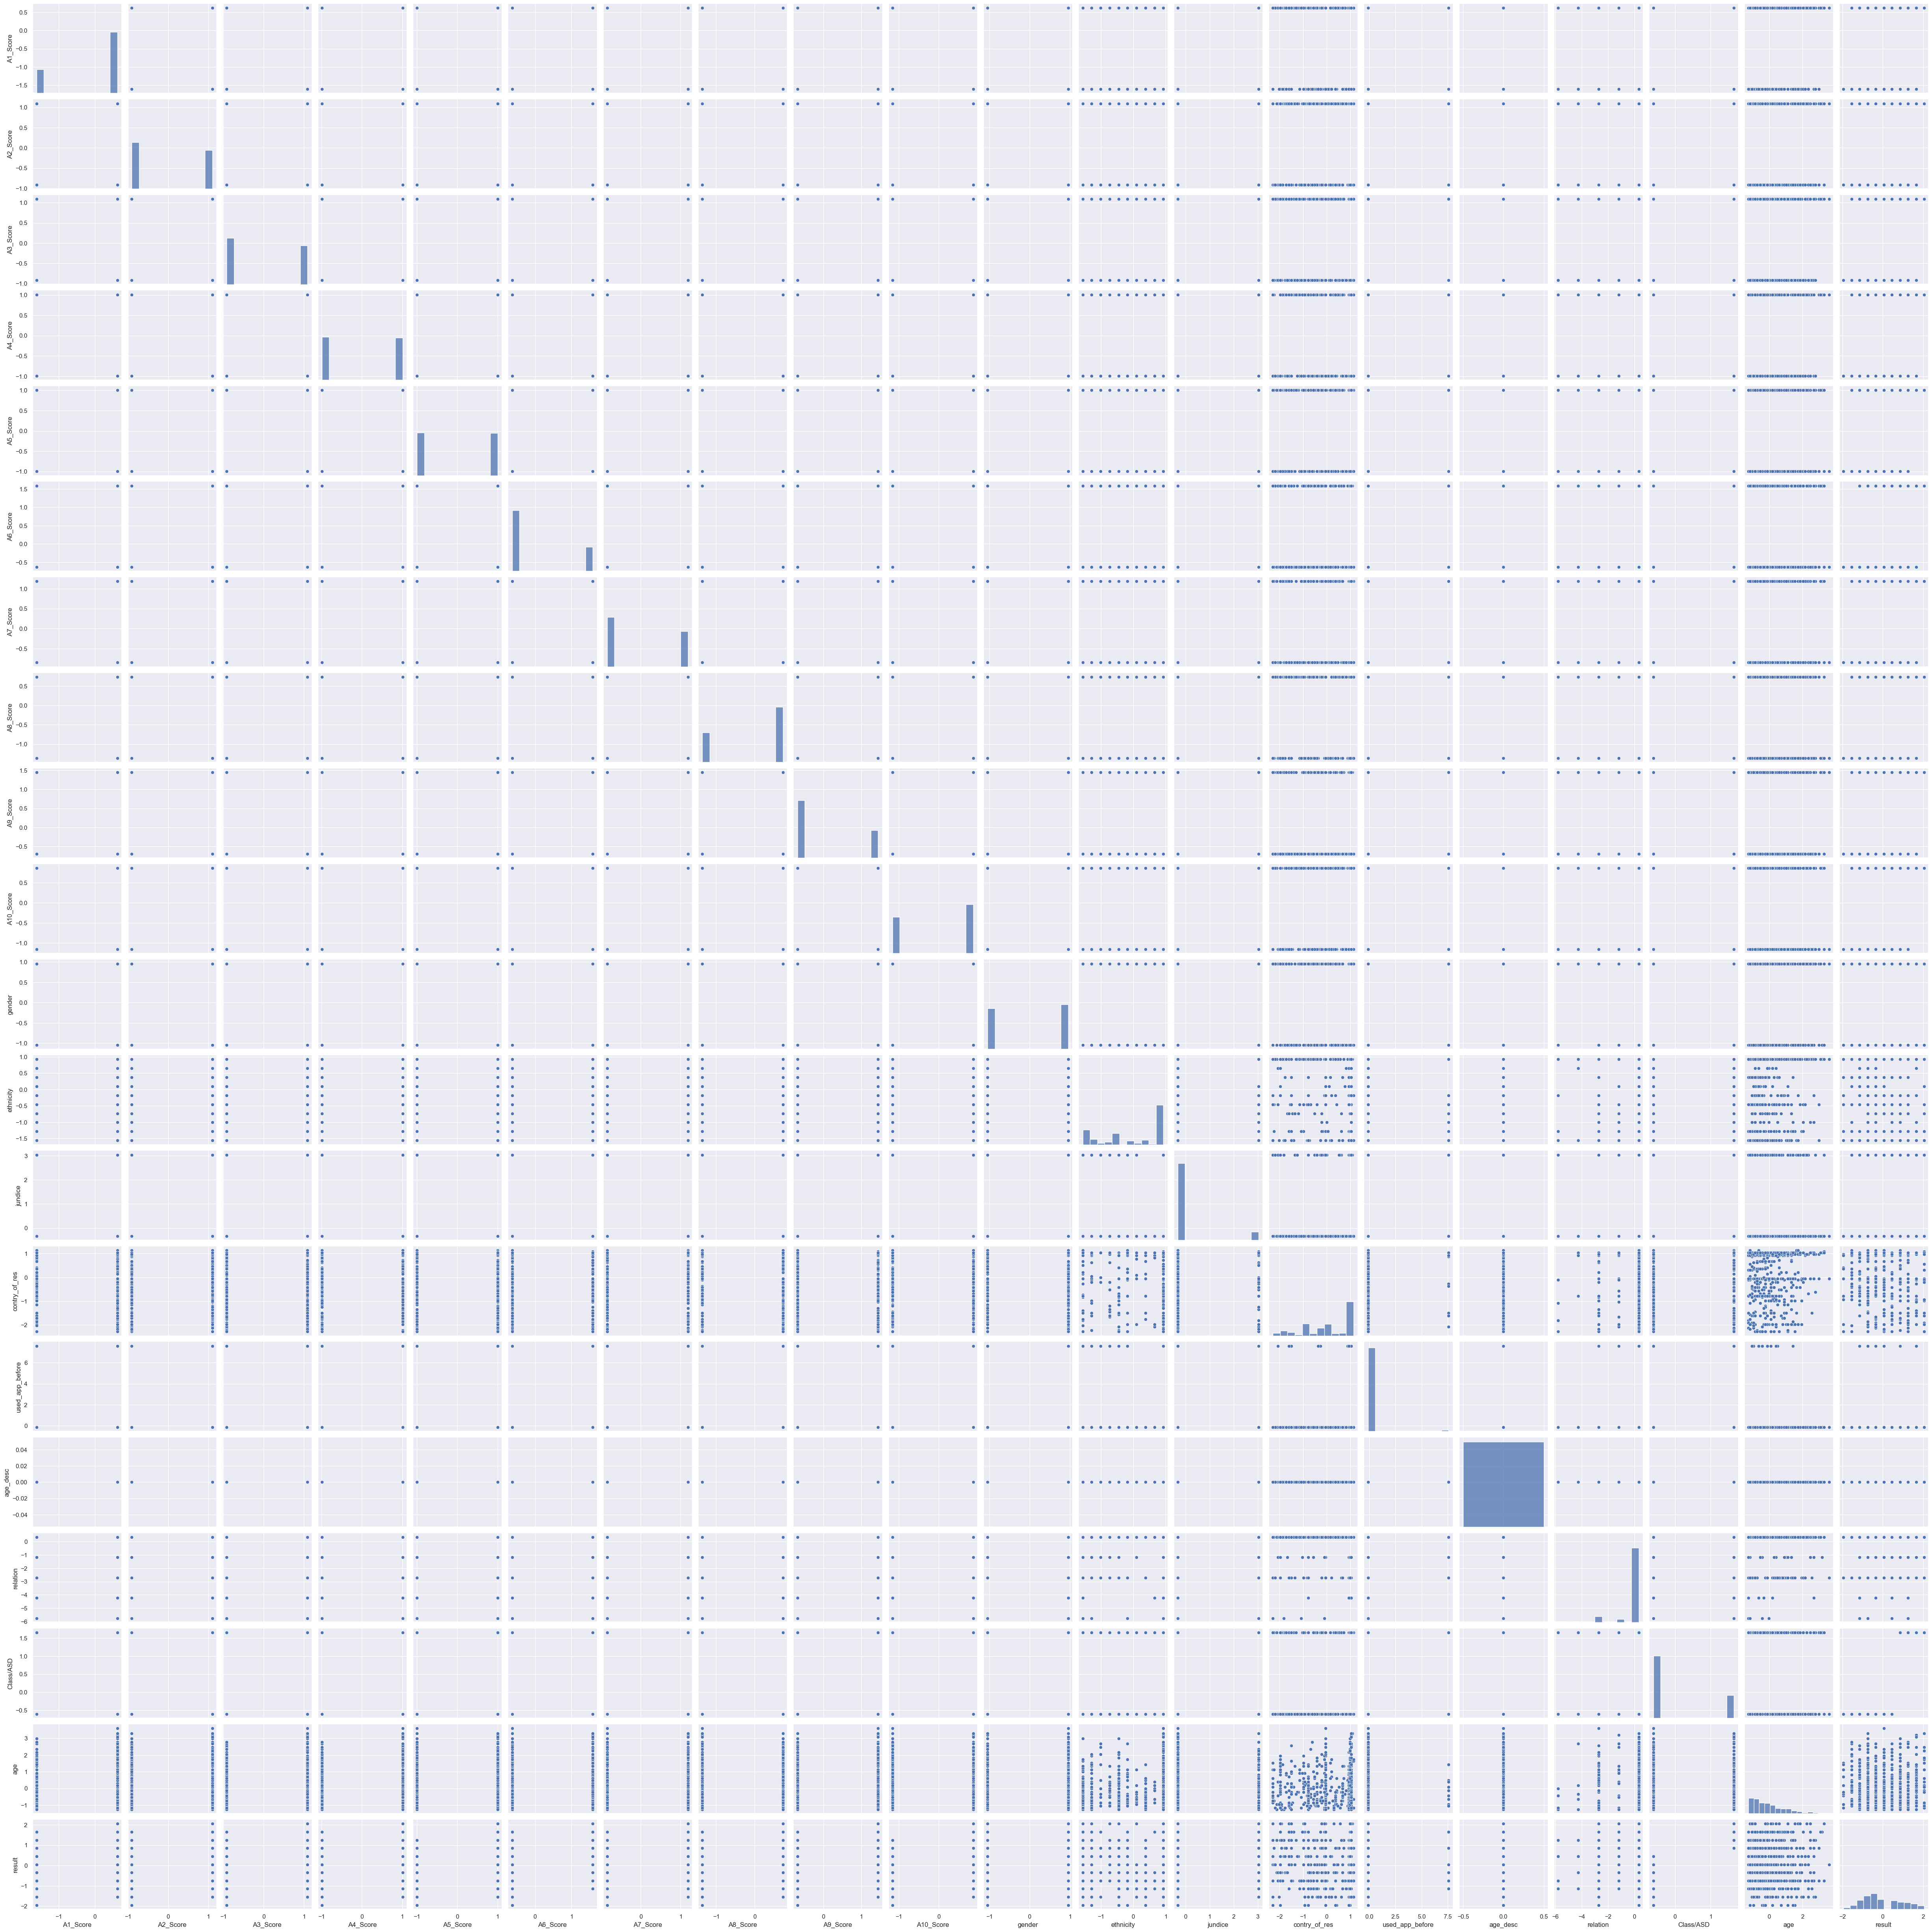

In [37]:
sns.pairplot(sc_x)

### 5. CATPLOT

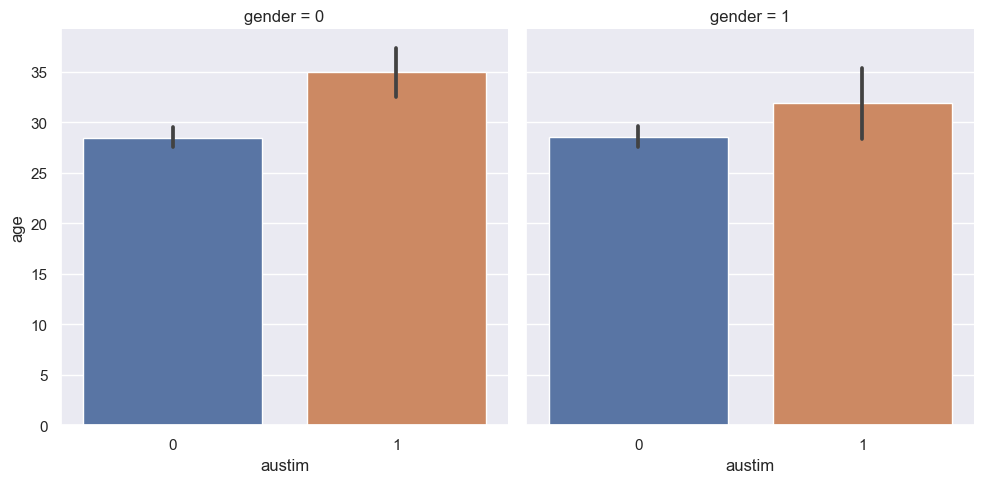

In [38]:
sns.catplot(data=df_new , x='austim' , y='age' ,kind = 'bar', col = "gender")

### 6. ADVANCED EDA - DTALE

In [ ]:
import dtale
import dtale.app as dtale_app
dtale.show(df_new)

# PRINCIPAL COMPONENT ANALYSIS(PCA) - DIMENSIONALITY REDUCTION

In [79]:
from sklearn.decomposition import PCA

In [80]:
pca = PCA(0.95)
x_pca = pca.fit_transform(sc_x)
print(sc_x.shape)
print(x_pca.shape)

(704, 20)
(704, 16)


# SPLIT DATA INTO TRAINING AND TEST

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=7)

# BUILDING  MODEL 

In [87]:
!pip install xgboost

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.metrics import  accuracy_score

## Applying all the model together

In [89]:
# LogisticRegression

logistic = LogisticRegression()
lr = logistic.fit(x_train, y_train)
y_pred_lr = logistic.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree

dtree = DecisionTreeClassifier()
dt = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest

rfmodel = RandomForestClassifier()
rf = rfmodel.fit(x_train, y_train)
y_pred_rf = rfmodel.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# BaggingClassifier

bagg = BaggingClassifier()
bg = bagg.fit(x_train, y_train)
y_pred_bg = bagg.predict(x_test)
accuracy_bg = accuracy_score(y_test, y_pred_bg)

# GradientBoostingClassifier

gdb = GradientBoostingClassifier()
gd = gdb.fit(x_train, y_train)
y_pred_gd = gdb.predict(x_test)
accuracy_gd = accuracy_score(y_test, y_pred_gd)

# XGBClassifier

xgb = XGBClassifier()
xg = xgb.fit(x_train, y_train)
y_pred_xg = xgb.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)


# SVM

svc = SVC()
sv = svc.fit(x_train, y_train)
y_pred_sv = svc.predict(x_test)
accuracy_sv = accuracy_score(y_test, y_pred_sv)             
                             
                             
# KNN

knn = KNeighborsClassifier()
kn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [90]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

In [91]:
evc = VotingClassifier(estimators=[('lr',lr),('dt',dt),('rf', rf),('bg', bg),
                                  ('gd', gd),('xg', xg),('sv', sv),('kn', kn)],voting='hard')

model_evc = evc.fit(x_train, y_train)
pred_evc = evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

          Method Used  Accuracy
0  LogisticRegression  0.865248
1        DecisionTree  0.765957
2        RandomForest  0.865248
3             Bagging  0.843972
4    GradientBoosting  0.822695
5             XGBoost  0.843972
6       SupportVector  0.865248
7   KNearestNeighbors  0.815603
8    VotingClassifier  0.865248
AxesSubplot(0.125,0.11;0.775x0.77)


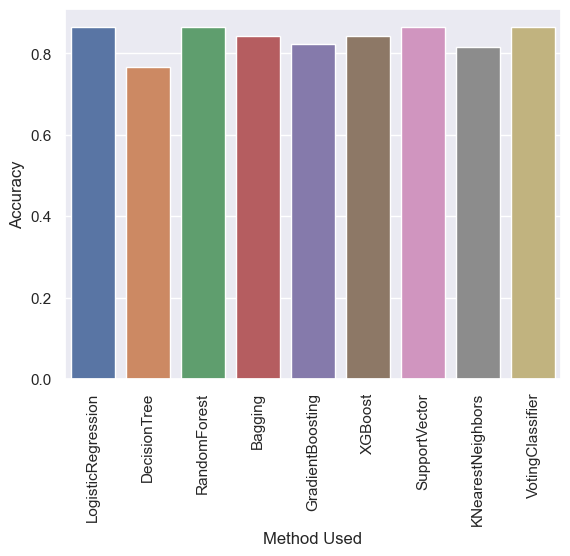

In [92]:
list1 = ['LogisticRegression','DecisionTree','RandomForest','Bagging',
         'GradientBoosting', 'XGBoost','SupportVector','KNearestNeighbors',
          'VotingClassifier']

list2 = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_bg,accuracy_gd, 
         accuracy_xg, accuracy_sv, accuracy_knn, accuracy_evc]

list3 = [logistic, dtree, rfmodel, bagg, gdb, xgb, svc, knn,evc ]

final_accuracy = pd.DataFrame({'Method Used': list1, "Accuracy": list2})
print(final_accuracy)

charts = sns.barplot(x="Method Used", y = 'Accuracy', data=final_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)

######          --------------- RANDOM FOREST MODEL - HIGHEST ACCURACY OF  86.5% ------

## RANDOM FOREST CLASSIFIER

In [93]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel.fit(x_train, y_train)

RandomForestClassifier()

In [94]:
y_pred_train_rf = rfmodel.predict(x_train)
y_pred_test_rf = rfmodel.predict(x_test)

In [95]:
print("TRAIN ACCURACY RF:" , accuracy_score(y_train , y_pred_train_rf).round(3))
print("TEST  ACCURACY RF:" , accuracy_score(y_test , y_pred_test_rf).round(3))

TRAIN ACCURACY RF: 1.0
TEST  ACCURACY RF: 0.865


#### ---- RandomForest model is Good model but overfitting occurs.To overcome overfitting problem applying Hyperparameter Tuning-----

### HYPERPARAMETER TUNING - RANDOMIZED SEARCH CV

In [139]:
rfmodel = RandomForestClassifier()

In [140]:
n_estimators= [20,60,100,200,250]
max_depth=[None,2,4,6,8]
max_features=['auto',"sqrt", "log2"] 
bootstrap=[True, False]
max_samples=[0.5,0.75,1.0,2.0]
min_samples_split=[2,4,8,10]
min_samples_leaf=[1,2,4]

In [141]:
param_distributions = {'n_estimators':n_estimators,"max_depth":max_depth,
             "max_features":max_features, "bootstrap":bootstrap,
             "max_samples":max_samples, 'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

print(param_distributions)

{'n_estimators': [20, 60, 100, 200, 250], 'max_depth': [None, 2, 4, 6, 8], 'max_features': ['auto', 'sqrt', 'log2'], 'bootstrap': [True, False], 'max_samples': [0.5, 0.75, 1.0, 2.0], 'min_samples_split': [2, 4, 8, 10], 'min_samples_leaf': [1, 2, 4]}


In [142]:
from sklearn.model_selection import RandomizedSearchCV

rf_ran = RandomizedSearchCV(estimator= rfmodel, param_distributions=param_distributions, cv=10,
                     n_jobs=-1, verbose=2 )

In [143]:
rf_ran.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 2, 4, 6, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_samples': [0.5, 0.75, 1.0, 2.0],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [20, 60, 100, 200,
                                                         250]},
                   verbose=2)

In [144]:
rf_ran.best_params_

{'n_estimators': 250,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 1.0,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': True}

 ###### --- Best parameters found in Hyper parameter tuning is applied and build new Random forest classifier model ---   

### Random Forest Classifier model with Hyper parameter tuning applied

In [145]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 250 , min_samples_split=2 ,min_samples_leaf=1,
                            max_features ='sqrt', max_depth = 4, bootstrap =True)
rf.fit(x_train, y_train)
y_pred_train_rf1 = rf.predict(x_train)
y_pred_test_rf1 = rf.predict(x_test)


In [146]:
print("TRAIN ACCURACY RF :" , accuracy_score(y_train , y_pred_train_rf1).round(3))
print("TEST ACCURACY RF :" , accuracy_score(y_test , y_pred_test_rf1).round(3))


TRAIN ACCURACY RF : 0.877
TEST ACCURACY RF : 0.872


### CROSS VALIDATION APPROACH

In [147]:
print("FINAL TRAIN ACCURACY RF :" , np.mean(cross_val_score(rf , x_train , y_train , cv=15)).round(3))
print("FINAL TEST ACCURACY RF :" , np.mean(cross_val_score(rf , x_test , y_test , cv=15)).round(3))

FINAL TRAIN ACCURACY RF : 0.87
FINAL TEST ACCURACY RF : 0.873


2023-10-17 11:53:24,730 - INFO     - Executing shutdown due to inactivity...
2023-10-17 11:53:28,859 - INFO     - Executing shutdown...


###### --- Random forest classifier model is the best model with good train and test accuracies for AUTISM PREDICTION IN ADULTS----


### CONCLUSION : 
### RANDOM FOREST CLASSIFIER :
###       TRAIN ACCURACY = 87.0 %
###       TEST  ACCURACY = 87.3 %